## High Accuracy CNN for MNIST in TF2

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
train_images = train_images.reshape((60000, 28, 28 , 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 , 28 , 1))
test_images = test_images.astype('float32') / 255

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [8]:
# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 32s 539us/sample - loss: 0.2301 - accuracy: 0.9289
Epoch 2/10
60000/60000 [==============================] - 31s 525us/sample - loss: 0.0523 - accuracy: 0.9841
Epoch 3/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.0349 - accuracy: 0.9894
Epoch 4/10
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0266 - accuracy: 0.9918
Epoch 5/10
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0204 - accuracy: 0.9931
Epoch 6/10
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0170 - accuracy: 0.9948
Epoch 7/10
60000/60000 [==============================] - 30s 507us/sample - loss: 0.0140 - accuracy: 0.9955
Epoch 8/10
60000/60000 [==============================] - 30s 506us/sample - loss: 0.0121 - accuracy: 0.9962
Epoch 9/10
60000/60000 [==============================] - 30s 503us/sample - loss: 0.0095 - accuracy: 0.9966
Epoch 10/10
60000/6

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 2s 192us/sample - loss: 0.0269 - accuracy: 0.9920
0.992


[[3.9531767e-11 1.2401433e-08 1.0000000e+00 1.1737353e-10 1.5589965e-11
  3.5331417e-16 5.0818658e-16 2.1414994e-09 2.9210092e-09 1.0501742e-11]]
2


/home/anirban/anaconda3/envs/tf2/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


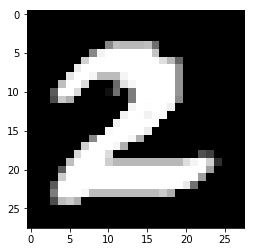

In [12]:
image = tf.keras.preprocessing.image 


temp_img=image.load_img("/home/anirban/Downloads/digit2.png",grayscale=True,target_size=(28,28)) 
temp_img=image.img_to_array(temp_img)
train_img=temp_img
#converting train images to array and applying mean subtraction processing
train_img=np.array(train_img)
train_img = train_img.reshape((1, 28 , 28 , 1)) 
train_img = train_img.astype('float32') / 255

lab = model.predict(train_img) 
print(lab) 
print(np.argmax(lab))


img = image.load_img("/home/anirban/Downloads/digit2.png", target_size=(28, 28))
plt.imshow(img)